In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [215]:
df = pd.read_csv('Data4.csv', sep=';', decimal=',', encoding='windows-1251').rename(columns={'Unnamed: 0': 'Country'})

In [216]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  132 non-null    object 
 1   ISO      132 non-null    object 
 2   UA       132 non-null    object 
 3   Cql      132 non-null    float64
 4   Ie       132 non-null    float64
 5   Iec      132 non-null    float64
 6   Is       132 non-null    float64
dtypes: float64(4), object(3)
memory usage: 7.3+ KB
     Country  ISO         UA       Cql        Ie       Iec        Is
0    Albania  ALB    Албанія  0.973924  0.605348  0.538673  0.510113
1    Algeria  DZA      Алжир  0.782134  0.587219  0.348159  0.497986
2     Angola  AGO     Ангола  0.372344  0.274394  0.332117  0.346907
3  Argentina  ARG  Аргентина  0.883830  0.699685  0.281995  0.518820
4    Armenia  ARM   Вірменія  1.016499  0.718327  0.535648  0.486498


In [217]:
df.corr()


/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_38663/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Cql,Ie,Iec,Is
Cql,1.000000,0.883664,0.875545,0.939172
Ie,0.883664,1.000000,0.619247,0.746320
Iec,0.875545,0.619247,1.000000,0.799211
Is,0.939172,0.746320,0.799211,1.000000


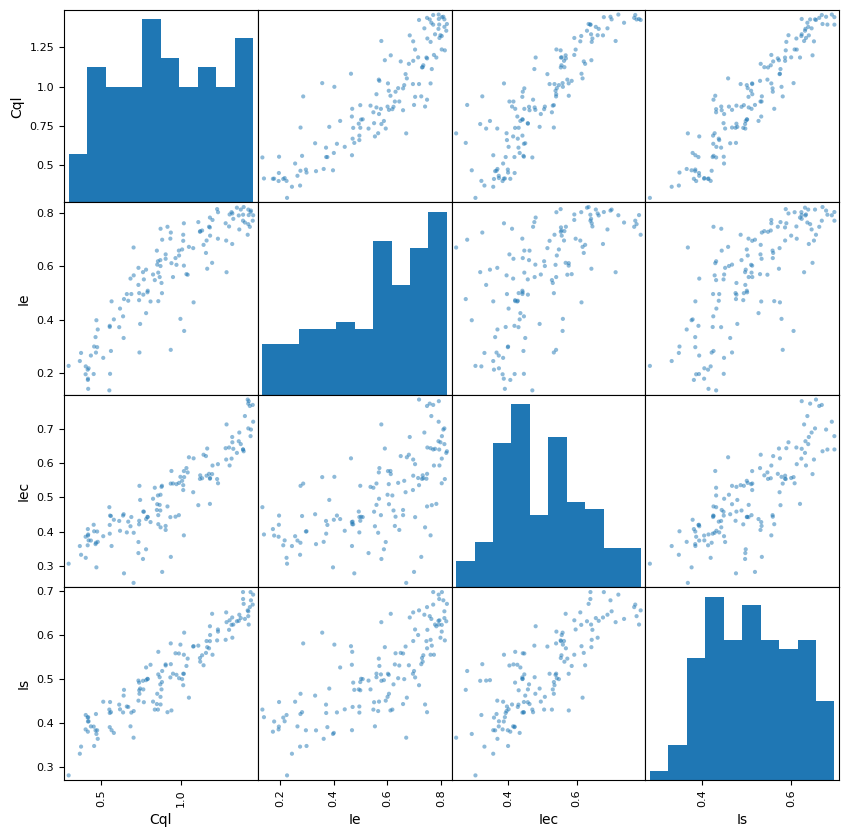

In [218]:

pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()



In [219]:
Y = df['Cql']

l_model1 = LinearRegression().fit(df[['Ie', 'Iec', 'Is']], Y)
l_model2 = LinearRegression().fit(df[['Iec', 'Is']], Y)
l_model3 = LinearRegression().fit(df[['Ie', 'Is']], Y)
l_model4 = LinearRegression().fit(df[['Ie', 'Iec']], Y)
l_model5 = LinearRegression().fit(df['Ie'].to_numpy().reshape(-1, 1), Y)
l_model6 = LinearRegression().fit(df['Iec'].to_numpy().reshape(-1, 1), Y)
l_model7 = LinearRegression().fit(df['Is'].to_numpy().reshape(-1, 1), Y)



In [220]:
p_model1 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
p_model1.fit(df[['Ie', 'Iec', 'Is']], Y)

p_model2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
p_model2.fit(df[['Iec', 'Is']], Y)

p_model3 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
p_model3.fit(df[['Ie', 'Iec']], Y)

p_model4 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
p_model4.fit(df['Iec'].to_numpy().reshape(-1, 1), Y)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

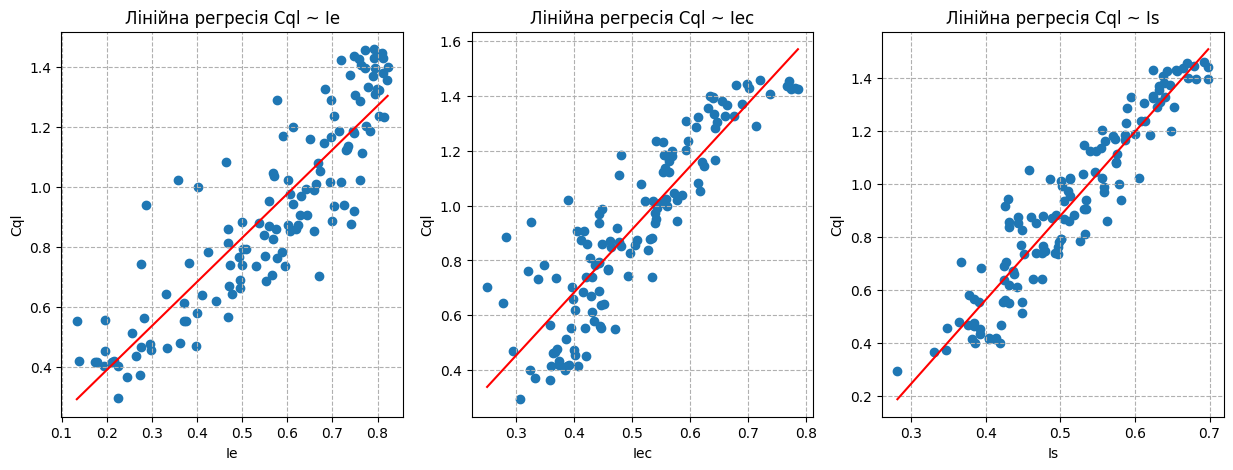

In [221]:
linear_models = [l_model5, l_model6, l_model7]

params = ['Ie', 'Iec', 'Is']
params_values = []
y_pred = []

for i in range(len(params)):
    values = np.linspace(df[params[i]].min(), df[params[i]].max()).reshape(-1, 1)
    params_values.append(values)
    y_pred.append(linear_models[i].predict(values))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(axes)):
    axes[i].set_title(f'Лінійна регресія Cql ~ {params[i]}')
    axes[i].set_xlabel(params[i])
    axes[i].set_ylabel('Cql')
    axes[i].grid(linestyle='--')
    axes[i].scatter(df[params[i]], Y)
    axes[i].plot(params_values[i], y_pred[i], color='red')



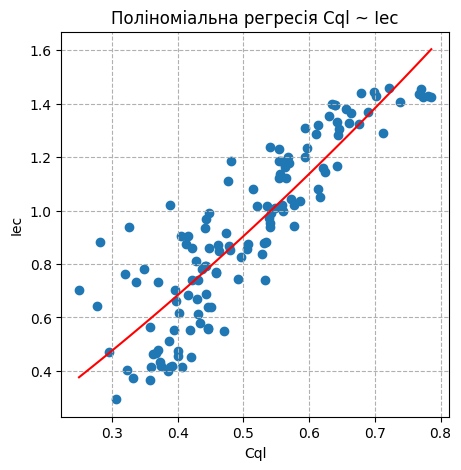

In [222]:
X_pol_test = np.linspace(df['Iec'].min(), df['Iec'].max()).reshape(-1, 1)
Y_pol_pred = p_model4.predict(X_pol_test)

plt.figure(figsize=(5, 5))

plt.title('Поліноміальна регресія Cql ~ Iec')
plt.xlabel('Cql')
plt.ylabel('Iec')
plt.grid(linestyle='--')

plt.scatter(df['Iec'], Y)
plt.plot(X_pol_test, Y_pol_pred, color='red')

plt.show()

In [223]:
from mpl_toolkits.mplot3d import Axes3D

/Users/andrey/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/andrey/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/andrey/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/andrey/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/andrey/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/User

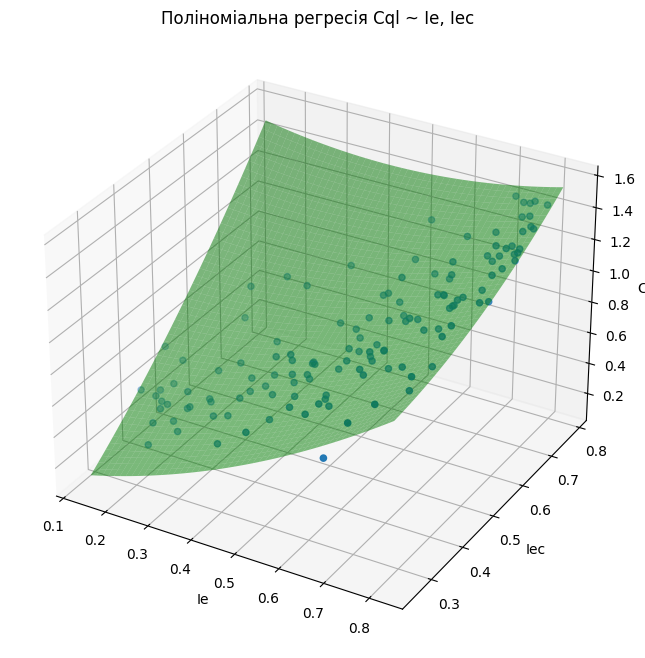

In [224]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_3d = params_values[0]
Y_3d = params_values[1]

XX, YY = np.meshgrid(X_3d, Y_3d)

Z = []
for i in range(len(Y_3d)):
    temp = []
    for j in range(len(X_3d)):
        temp.append(p_model3.predict(np.array([X_3d[j], Y_3d[i]]).T)[0])
    Z.append(temp)
    
Z = np.array(Z)

ax.set_title('Поліноміальна регресія Cql ~ Ie, Iec')
ax.set_xlabel('Ie')
ax.set_ylabel('Iec')
ax.set_zlabel('Cql')
ax.plot_surface(
    XX, YY,
    np.array(Z),
    color='green',
    alpha=0.5
)
ax.scatter(df['Ie'], df['Iec'], Y)

plt.show()


In [225]:
df_test = pd.read_csv('Data4t.csv', encoding='windows-1251', sep=';', decimal=',').rename(columns={'Unnamed: 0': 'Country'})

df_test

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Togo,TGO,Того,0.453498,0.216806,0.368235,0.433951
1,Tunisia,TUN,Туніс,0.899462,0.659124,0.418256,0.514746
2,Turkey,TUR,Туреччина,0.859284,0.498840,0.509228,0.499453
3,Uganda,UGA,Уґанда,0.571284,0.362946,0.448732,0.375726
4,Ukraine,UKR,Україна,0.802204,0.689164,0.303555,0.462744


In [226]:
test_predictions = []
names = ['l_model1' ,'l_model2' ,'l_model3' ,'l_model4' ,'l_model5' ,'l_model6' ,'l_model7' , 'p_model1', 'p_mode2', 'p_model3', 'p_model4']

test_predictions.append(l_model1.predict(df_test[['Ie', 'Iec', 'Is']]))
test_predictions.append(l_model2.predict(df_test[['Iec', 'Is']]))
test_predictions.append(l_model3.predict(df_test[['Ie', 'Is']]))
test_predictions.append(l_model4.predict(df_test[['Ie', 'Iec']]))
test_predictions.append(l_model5.predict(df_test['Ie'].to_numpy().reshape(-1, 1)))
test_predictions.append(l_model6.predict(df_test['Iec'].to_numpy().reshape(-1, 1)))
test_predictions.append(l_model7.predict(df_test['Is'].to_numpy().reshape(-1, 1)))
test_predictions.append(p_model1.predict(df_test[['Ie', 'Iec', 'Is']]))
test_predictions.append(p_model2.predict(df_test[['Iec', 'Is']]))
test_predictions.append(p_model3.predict(df_test[['Ie', 'Iec']]))
test_predictions.append(p_model4.predict(df_test['Iec'].to_numpy().reshape(-1, 1)))

test_predictions = np.array(test_predictions)


In [227]:
best = np.sum((test_predictions - df_test['Cql'].to_numpy()) ** 2, axis=1).argmin()

print(f'The best solusion is {names[best]}')


The best solusion is p_model1
